In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
train_df = pd.read_csv(r"C:\Users\asus\Desktop\All_PY\Loan_prediction\train_ctrUa4K.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
test_df = pd.read_csv(r"C:\Users\asus\Desktop\All_PY\Loan_prediction\test_lAUu6dG.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [57]:
train_original = train_df.copy()
test_original = test_df.copy()

In [58]:
train_df.shape

(614, 13)

In [59]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

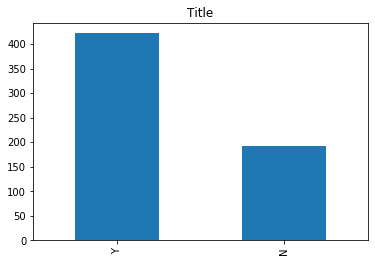

In [60]:
train_df['Loan_Status'].value_counts(normalize=True)
train_df['Loan_Status'].value_counts().plot.bar(title='Title')

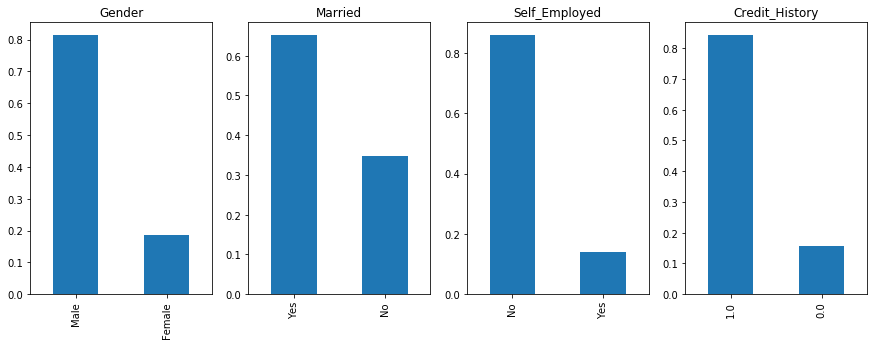

In [61]:

plt.figure(1)
plt.subplot(141) 
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize= (15,5), title = 'Gender')
plt.subplot(142) 
train_df['Married'].value_counts(normalize=True).plot.bar(title = 'Married')
plt.subplot(143) 
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed')
plt.subplot(144) 
train_df['Credit_History'].value_counts(normalize=True).plot.bar(title = 'Credit_History')
plt.show()

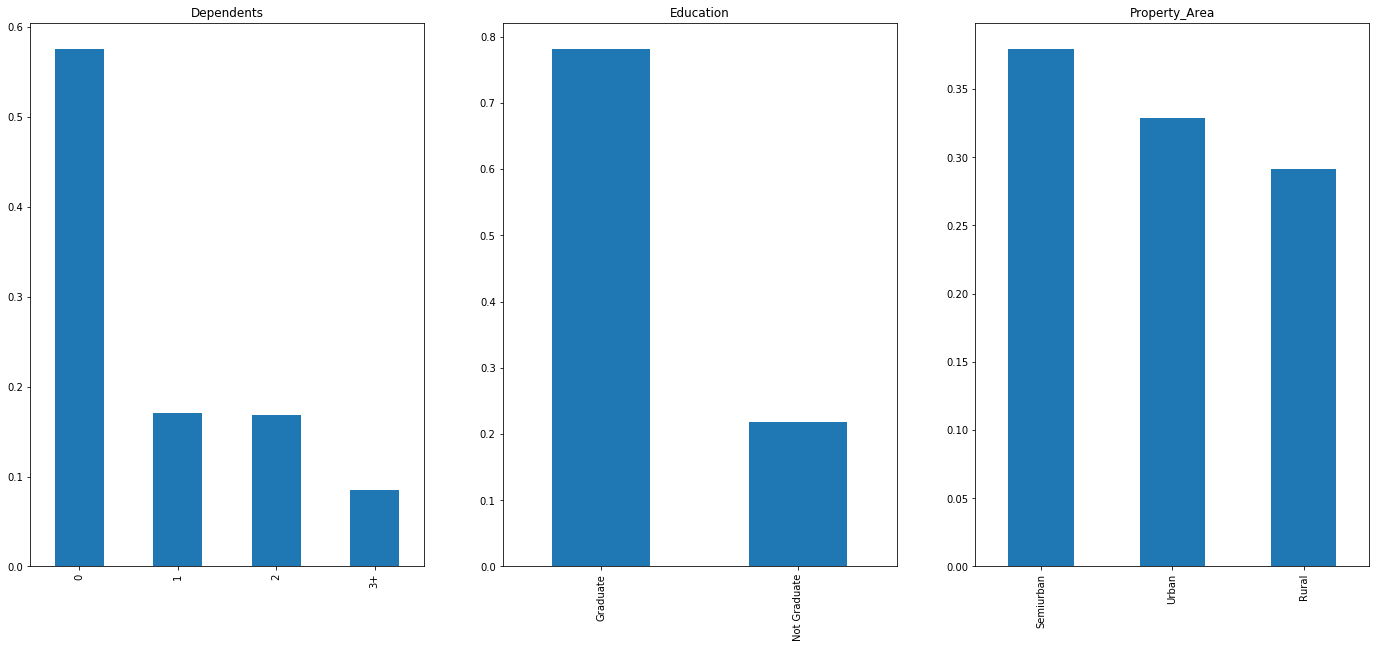

In [62]:
plt.figure(1)
plt.subplot(131) 
train_df['Dependents'].value_counts(normalize=True).plot.bar(figsize= (24,10), title = 'Dependents')
plt.subplot(132) 
train_df['Education'].value_counts(normalize=True).plot.bar(title = 'Education')
plt.subplot(133) 
train_df['Property_Area'].value_counts(normalize=True).plot.bar(title = 'Property_Area')
plt.show()

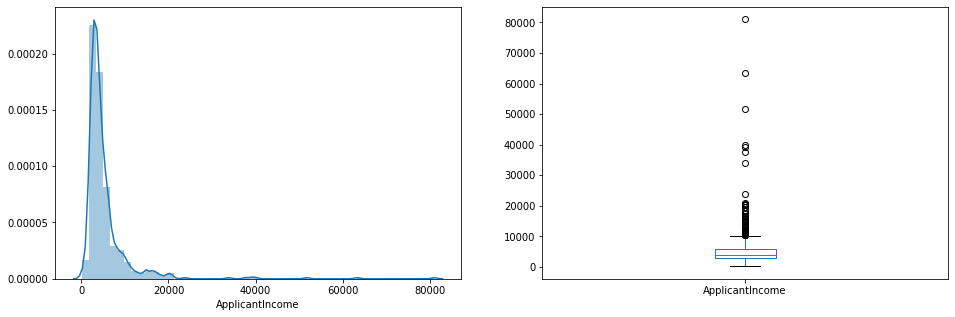

In [63]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train_df['ApplicantIncome']);

plt.subplot(122) 
train_df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

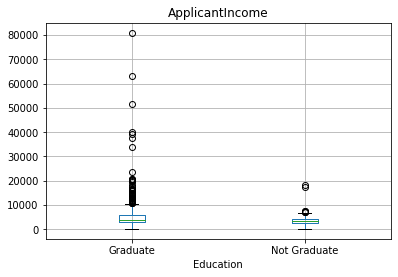

In [64]:
train_df.boxplot(column= 'ApplicantIncome', by = 'Education') 
plt.suptitle("")

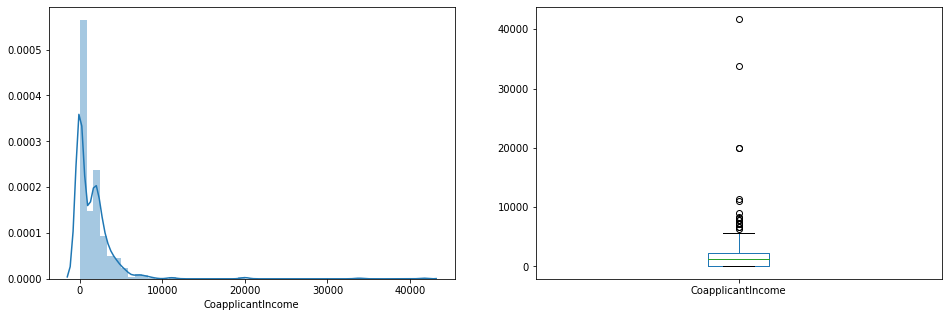

In [65]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train_df['CoapplicantIncome']);

plt.subplot(122) 
train_df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

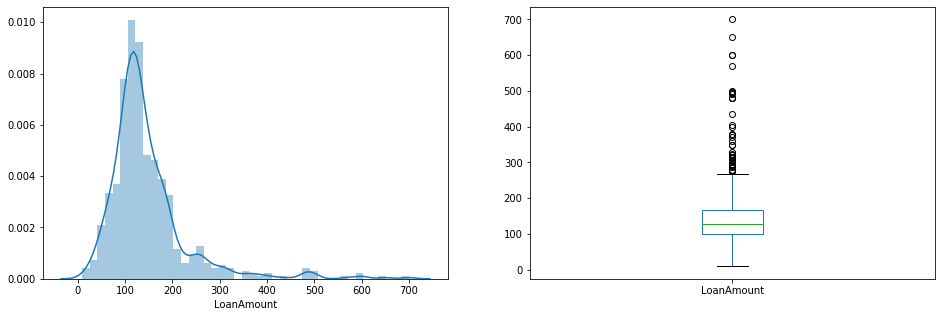

In [66]:
plt.figure(1)
plt.subplot(121) 
df= train_df.dropna()
sns.distplot(train_df['LoanAmount']);

plt.subplot(122) 
train_df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

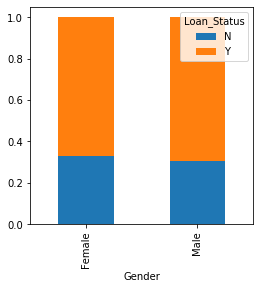

In [67]:
Gender = pd.crosstab(train_df['Gender'], train_df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True, figsize = (4,4))

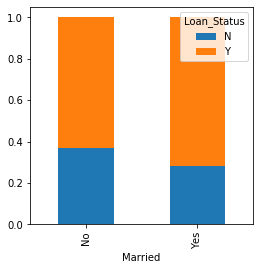

In [68]:
Married = pd.crosstab(train_df['Married'], train_df['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True, figsize = (4,4))

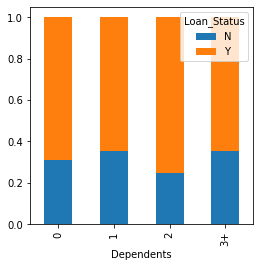

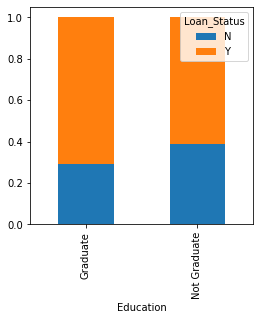

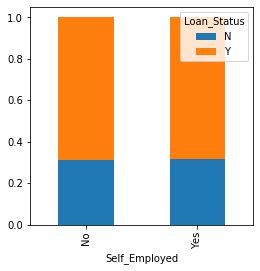

In [69]:
Dependents = pd.crosstab(train_df['Dependents'], train_df['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True, figsize = (4,4))

Education = pd.crosstab(train_df['Education'], train_df['Loan_Status']) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True, figsize = (4,4))

Self_Employed = pd.crosstab(train_df['Self_Employed'], train_df['Loan_Status']) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True, figsize = (4,4))

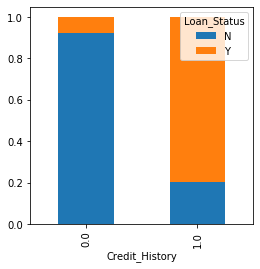

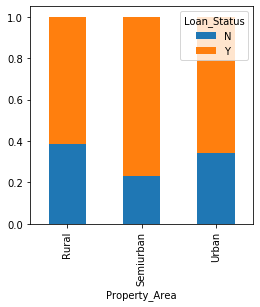

In [70]:
Credit_History = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True, figsize = (4,4))

Property_Area = pd.crosstab(train_df['Property_Area'], train_df['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True, figsize = (4,4))

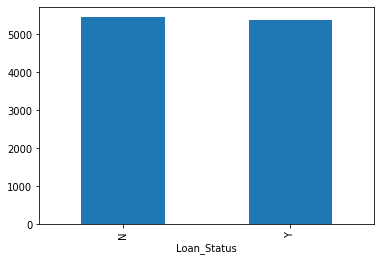

In [71]:
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

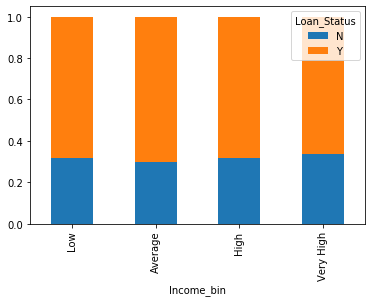

In [72]:
bins = [0,2500,4000,6000,81000] 
group = ['Low', 'Average','High','Very High']
train_df['Income_bin']= pd.cut(train_df['ApplicantIncome'],bins, labels = group)

Income_bin = pd.crosstab(train_df['Income_bin'], train_df['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True)

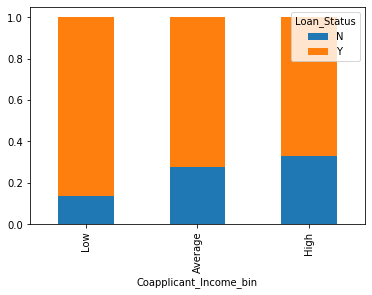

In [73]:
bins = [0,1000,3000,42000] 
group = ['Low', 'Average','High']
train_df['Coapplicant_Income_bin']= pd.cut(train_df['CoapplicantIncome'],bins, labels = group)

Coapplicant_Income_bin = pd.crosstab(train_df['Coapplicant_Income_bin'], train_df['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True)

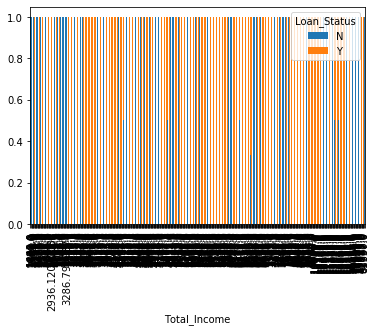

In [74]:
train_df['Total_Income'] = train_df['ApplicantIncome']+ train_df['CoapplicantIncome']
bins = [0,2500,4000,6000,81000] 
group= ['Low','Average','High','Very high']
train_df['Total_Income_bin']= pd.cut(train_df['Total_Income'], bins, labels = group)

Total_Income_bin = pd.crosstab(train_df['Total_Income'], train_df['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True)

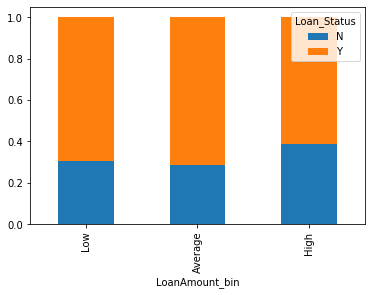

In [75]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train_df['LoanAmount_bin']= pd.cut(train_df['LoanAmount'],bins, labels = group)

LoanAmount_bin = pd.crosstab(train_df['LoanAmount_bin'], train_df['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind = "bar", stacked= True)

In [76]:
train_df= train_df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis =1)

train_df['Dependents'].replace('3+',3, inplace= True) 
test_df['Dependents'].replace('3+',3, inplace= True)
train_df['Loan_Status'].replace('N',0, inplace= True) 
train_df['Loan_Status'].replace('Y',1, inplace= True)


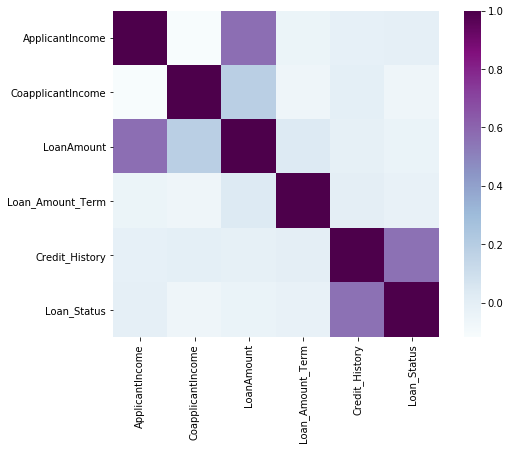

In [77]:

matrix = train_df.corr() 
f, ax = plt.subplots(figsize = (9,6)) 
sns.heatmap(matrix, vmax=1, square= True, cmap = "BuPu")

In [78]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace= True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace= True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace= True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace= True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace= True)
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [81]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace= True)

In [82]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace= True)

In [83]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace= True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace= True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace= True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace= True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace= True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace= True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace= True)

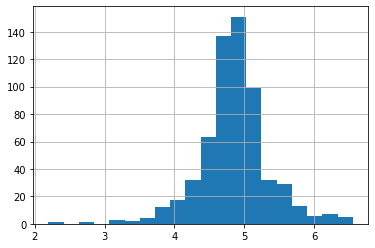

In [85]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])
train_df['LoanAmount_log'].hist(bins=20)

test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

In [86]:
train_df.drop('Loan_ID', axis =1)
test_df.drop('Loan_ID', axis =1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595


In [87]:
X= train_df.drop('Loan_Status' , 1)
y= train_df.Loan_Status

In [88]:
X= pd.get_dummies(X)
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)


In [89]:
from sklearn.model_selection  import train_test_split
x_train, x_cv, y_train, y_cv= train_test_split(X, y, test_size = 0.3)

In [90]:
from sklearn.linear_model  import LogisticRegression

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred_cv = model.predict(x_cv)

In [94]:
accuracy_score(y_cv, pred_cv)

0.8

In [95]:
pred_test = model.predict(test_df)

ValueError: X has 388 features per sample; expecting 635